D:\Anaconda3\envs\py35\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


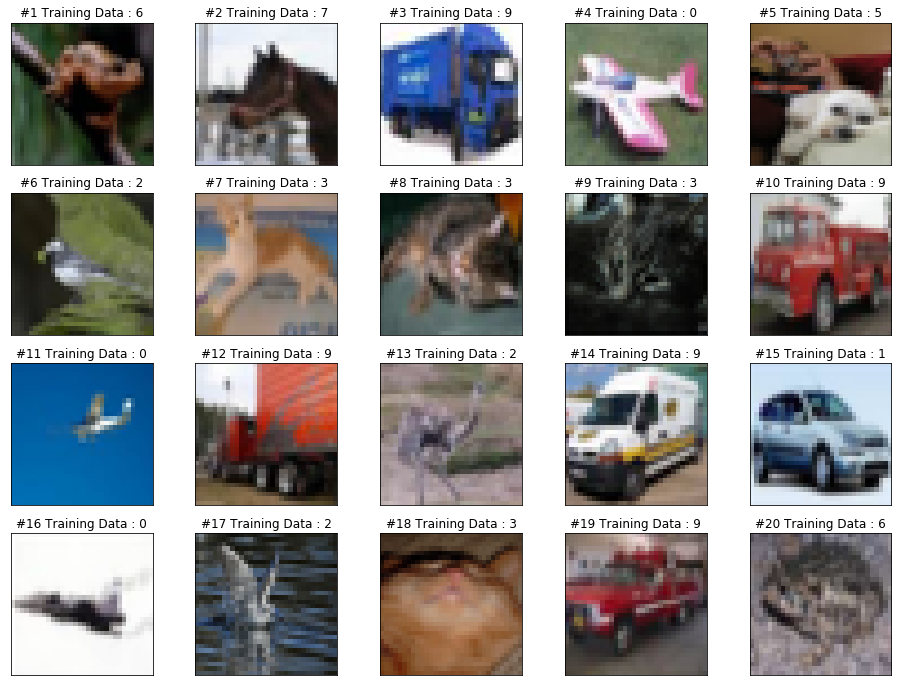

In [5]:
from numpy import *
import tensorflow as tf
from matplotlib.pyplot import *
import os
import random
#from PIL import Image, ImageCms
import cv2
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D,normalization
import keras
from pandas import *
from keras.datasets import cifar10

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.4)  
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
tf.keras.backend.set_session(sess)

learning_rate = 0.003

def plot_train_data(img,label):
    show_train = gcf()
    show_train.set_size_inches(16, 12)
    for i in range(20):
        p = subplot(4,5,1+i)
        p.imshow(img[i])
        title = "#" + str(i + 1) + " Training Data " + ": " + str(argmax(label[i,:]))
        p.set_title(title, fontsize=12)  
        p.set_xticks([])
        p.set_yticks([])
    show_train.show()

def show_train_history(train_history, train, validation):
    figure().set_size_inches(10, 6)
    plot(train_history.history[train],'b',linewidth=1.5)
    plot(train_history.history[validation],'r',linewidth=1.5)
    xticks(fontsize=8)
    yticks(fontsize=8)
    title("Train " + train + " curve",fontsize=18)
    ylabel(train)
    xlabel('Epoch')
    legend(['train', 'validation'], loc='center right')
    savefig("train_history_" + train + ".png")
    show()

################
##  LOAD DATA ##
label_dict={0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',
        6:'frog',7:'horse',8:'ship',9:'truck'}


(x_train,y_train),(x_test,y_test)=cifar10.load_data()
#RGB2LAB
#for i in range(len(x_train)):
#    x_train[i] = cv2.cvtColor(x_train[i],cv2.COLOR_RGB2LAB)
#for j in range(len(x_test)):
#    x_test[j] = cv2.cvtColor(x_test[j],cv2.COLOR_RGB2LAB)

train_img = x_train[5000:50000]/255
train_label = np_utils.to_categorical(y_train[5000:50000])
test_img = x_test/255
test_label = np_utils.to_categorical(y_test)
validation_img = x_train[0:5000]/255
validation_label = np_utils.to_categorical(y_train[0:5000])

################
##  SHOW DATA ##

plot_train_data(train_img,train_label)

In [ ]:
##################
##  BUILD MODEL ##

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape = (32,32,3),activation="relu",padding="same",kernel_regularizer=keras.regularizers.l2(3e-5)))
model.add(normalization.BatchNormalization(axis=1, momentum=0.9, epsilon=0.001, center=True, scale=False))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same",kernel_regularizer=keras.regularizers.l2(3e-5)))
model.add(normalization.BatchNormalization(axis=1, momentum=0.9, epsilon=0.001, center=True, scale=True))
model.add(Dropout(rate=0.25))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same",kernel_regularizer=keras.regularizers.l2(3e-5)))
model.add(normalization.BatchNormalization(axis=1, momentum=0.9, epsilon=0.001, center=True, scale=False))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same",kernel_regularizer=keras.regularizers.l2(3e-5)))
model.add(normalization.BatchNormalization(axis=1, momentum=0.9, epsilon=0.001, center=True, scale=True))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(rate=0.25))
model.add(Dense(512,activation="relu",kernel_regularizer=keras.regularizers.l2(2e-5)))
model.add(normalization.BatchNormalization(axis=1, momentum=0.9, epsilon=0.001, center=True, scale=False))
model.add(Dropout(rate=0.25))
model.add(Dense(128,activation="relu",kernel_regularizer=keras.regularizers.l2(2e-5)))
model.add(normalization.BatchNormalization(axis=1, momentum=0.9, epsilon=0.001, center=True, scale=False))
model.add(Dropout(rate=0.25))
model.add(Dense(10,activation="softmax",kernel_regularizer=keras.regularizers.l2(2e-5)))

print (model.summary())

adam = keras.optimizers.Adam(lr=learning_rate,decay=0.02, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss="categorical_crossentropy",optimizer=adam,metrics=['accuracy'])

ES1 = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min')
ES2 = keras.callbacks.EarlyStopping(monitor='val_acc', patience=25, verbose=1, mode='max')

##################
##  TRAIN MODEL ##

train_history = model.fit(train_img,train_label,validation_data=(validation_img,validation_label),epochs=150,batch_size=128,shuffle=True,verbose=1,callbacks=[ES1,ES2])

#model.save("hw2_2.h5")
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        96        
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
__________